<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


<Axes: ylabel='MEDV'>

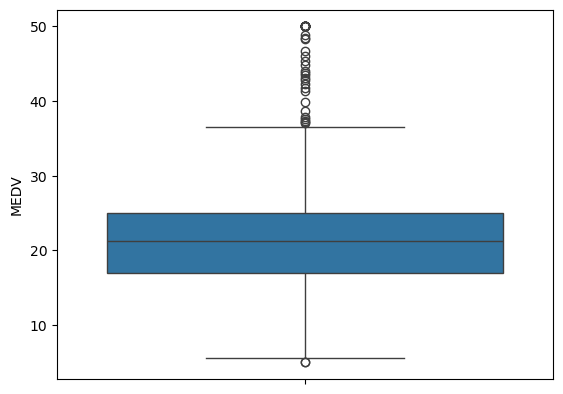

In [4]:
sns.boxplot(boston_df['MEDV'])

<Axes: ylabel='CHAS'>

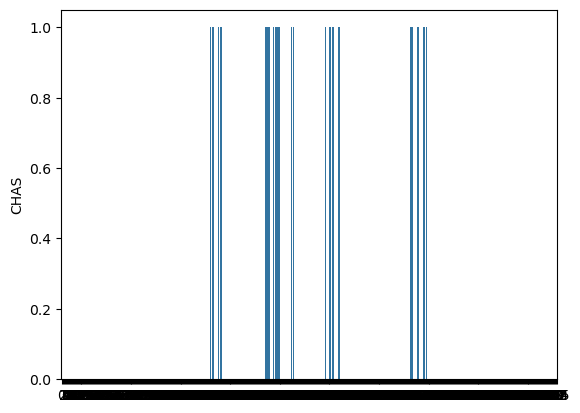

In [5]:
sns.barplot(boston_df['CHAS'])

<Axes: xlabel='AGE', ylabel='MEDV'>

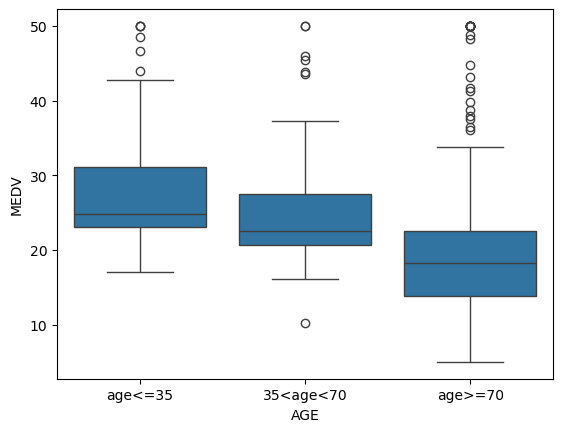

In [6]:
ages = [0.0, 35.0, 70.0, 100.0]
labels = ['age<=35', '35<age<70', 'age>=70']
data = pd.DataFrame({'MEDV': boston_df['MEDV'], 'AGE': pd.cut(boston_df['AGE'], bins=ages, labels=labels, include_lowest=True)})
sns.boxplot(data=data, x='AGE', y='MEDV')

<Axes: xlabel='NOX', ylabel='INDUS'>

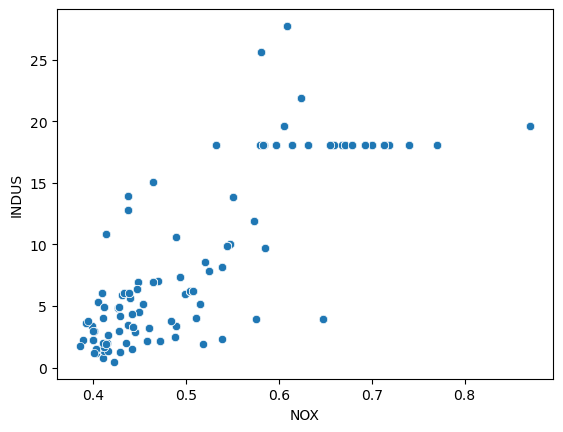

In [7]:
sns.scatterplot(boston_df, x='NOX', y='INDUS')

<Axes: xlabel='PTRATIO', ylabel='Count'>

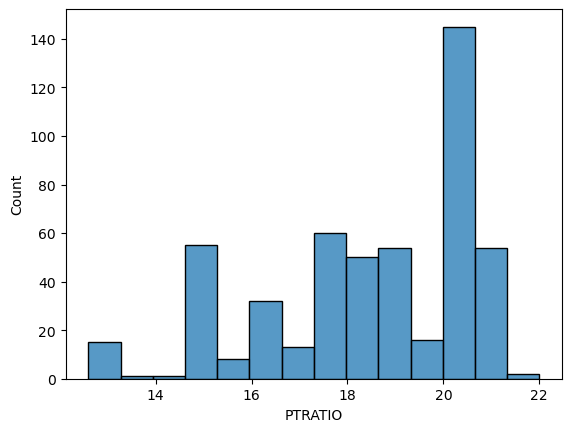

In [8]:
sns.histplot(data=boston_df,x='PTRATIO')

In [9]:
# Sample data: Test scores of two independent groups
charles_river = boston_df[boston_df['CHAS']==1.0]['MEDV']
not_charles_river = boston_df[boston_df['CHAS']==0.0]['MEDV']

# Perform the T-test
t_statistic, p_value = scipy.stats.ttest_ind(charles_river, not_charles_river)

# Output the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Yes, there is a significant difference between the groups. Reject the null hypothesis.")
else:
    print("No significant difference between the groups. Fail to reject the null hypothesis.")

T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05
Yes, there is a significant difference between the groups. Reject the null hypothesis.


In [10]:
group_1 = boston_df.loc[boston_df['AGE']<=35.0, 'MEDV']
group_2 = boston_df.loc[(boston_df['AGE']>35.0) & (boston_df['AGE']<=70.0), 'MEDV']
group_3 = boston_df.loc[(boston_df['AGE']>70.0) & (boston_df['AGE']<=100.0), 'MEDV']

f_statistic, p_value = scipy.stats.f_oneway(group_1, group_2, group_3)

print('F-statistic:', f_statistic)
print('P-value:', p_value)

if p_value < alpha:
    print('Yes, at least one group is different. Reject the null hypothesis.')
else:
    print("There's no significant difference between the groups. Fail to reject the null hypothesis.")

F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15
Yes, at least one group is different. Reject the null hypothesis.


In [11]:
correlation_coefficient, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print('Pearson correlation coefficient:', correlation_coefficient)
print('P-value:', p_value)

if p_value < alpha:
    print('There is a significant correlation between the Nitric oxide concentrations and proportions of non-retail business acres per town.')
else:
    print('There is not enough evidence of correlation between the Nitric oxide concentrations and proportions of non-retail business acres per town.')

Pearson correlation coefficient: 0.763651446920915
P-value: 7.913361061241167e-98
There is a significant correlation between the Nitric oxide concentrations and proportions of non-retail business acres per town.


In [12]:
X = boston_df[['DIS']]
y = boston_df[['MEDV']]

model = LinearRegression()
model.fit(X, y)

coefficient = model.coef_[0]

print("Coefficient (Impact of an additional weighted distance do the five Bosto employment centres on the median value of owner occupied homes)", coefficient)

Coefficient (Impact of an additional weighted distance do the five Bosto employment centres on the median value of owner occupied homes) [1.09161302]
